In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataloader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris = iris.drop(columns=['species'])
iris.head(), iris.shape, iris.dtypes, type(iris)

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 (150, 4),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 dtype: object,
 pandas.core.frame.DataFrame)

In [4]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X, y

(     sepal_length  sepal_width  petal_length
 0             5.1          3.5           1.4
 1             4.9          3.0           1.4
 2             4.7          3.2           1.3
 3             4.6          3.1           1.5
 4             5.0          3.6           1.4
 ..            ...          ...           ...
 145           6.7          3.0           5.2
 146           6.3          2.5           5.0
 147           6.5          3.0           5.2
 148           6.2          3.4           5.4
 149           5.9          3.0           5.1
 
 [150 rows x 3 columns],
 0      0.2
 1      0.2
 2      0.2
 3      0.2
 4      0.2
       ... 
 145    2.3
 146    1.9
 147    2.0
 148    2.3
 149    1.8
 Name: petal_width, Length: 150, dtype: float64)

# Visualize each feature

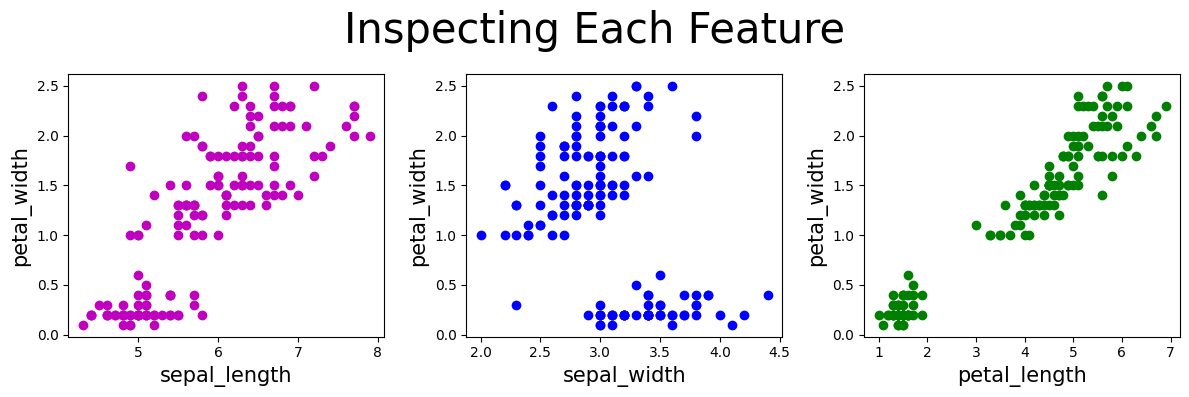

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(X['sepal_length'],y,'mo')
axes[0].set_ylabel("petal_width", fontsize = 15)
axes[0].set_xlabel("sepal_length", fontsize = 15)

axes[1].plot(X['sepal_width'],y,'bo')
axes[1].set_ylabel("petal_width", fontsize = 15)
axes[1].set_xlabel("sepal_width", fontsize = 15)


axes[2].plot(X['petal_length'],y,'go')
axes[2].set_ylabel('petal_width', fontsize = 15)
axes[2].set_xlabel("petal_length", fontsize = 15)

plt.tight_layout()

In [6]:
y = y.values.reshape(-1, 1)
y

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

#### Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Transform to pytorch

In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

#### Create Neural Network

In [15]:
model = nn.Sequential(
    nn.Linear(3, 1)
)
model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)